In [9]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [11]:
import pandas as pd
df = pd.read_csv(r"C:\Users\rumjhum\Desktop\DM Project\basket_analysis.csv")

In [12]:
df.head()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
#Creating Dummy Variables
df1 = pd.get_dummies(df)
df2 = df1.iloc[:,1:]
df2.head()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
frequent_items = apriori(df2,min_support = 0.2, use_colnames = True)
print(frequent_items)

     support                itemsets
0   0.383383                 (Apple)
1   0.384384                 (Bread)
2   0.420420                (Butter)
3   0.404404                (Cheese)
4   0.407407                  (Corn)
5   0.398398                  (Dill)
6   0.384384                  (Eggs)
7   0.410410             (Ice cream)
8   0.408408          (Kidney Beans)
9   0.405405                  (Milk)
10  0.401401                (Nutmeg)
11  0.403403                 (Onion)
12  0.409409                 (Sugar)
13  0.389389               (Unicorn)
14  0.420420                (Yogurt)
15  0.421421             (chocolate)
16  0.207207     (Ice cream, Butter)
17  0.202202  (Kidney Beans, Butter)
18  0.202202     (chocolate, Butter)
19  0.200200  (Kidney Beans, Cheese)
20  0.202202  (chocolate, Ice cream)
21  0.211211       (Milk, chocolate)


In [19]:
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
type(rules)
rules.shape

(12, 9)

In [20]:
#Displaying Rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579
1,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571
2,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905
3,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,0.030499,1.139764
4,(chocolate),(Butter),0.421421,0.420420,0.202202,0.479810,1.141262,0.025028,1.114169
5,(Butter),(chocolate),0.420420,0.421421,0.202202,0.480952,1.141262,0.025028,1.114693
6,(Kidney Beans),(Cheese),0.408408,0.404404,0.200200,0.490196,1.212143,0.035038,1.168284
7,(Cheese),(Kidney Beans),0.404404,0.408408,0.200200,0.495050,1.212143,0.035038,1.171583
8,(chocolate),(Ice cream),0.421421,0.410410,0.202202,0.479810,1.169098,0.029246,1.133412
9,(Ice cream),(chocolate),0.410410,0.421421,0.202202,0.492683,1.169098,0.029246,1.140467


In [21]:
#Extracting Top 10 Rules with Highest Support
rules.sort_values('support', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(Milk),(chocolate),0.405405,0.421421,0.211211,0.520988,1.236263,0.040365,1.207857
11,(chocolate),(Milk),0.421421,0.405405,0.211211,0.501188,1.236263,0.040365,1.192021
0,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579
1,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571
2,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905
3,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,0.030499,1.139764
4,(chocolate),(Butter),0.421421,0.420420,0.202202,0.479810,1.141262,0.025028,1.114169
5,(Butter),(chocolate),0.420420,0.421421,0.202202,0.480952,1.141262,0.025028,1.114693
8,(chocolate),(Ice cream),0.421421,0.410410,0.202202,0.479810,1.169098,0.029246,1.133412
9,(Ice cream),(chocolate),0.410410,0.421421,0.202202,0.492683,1.169098,0.029246,1.140467


In [24]:
#Selecting only those rules which have lift>2, Support>0.1
rules[(rules['lift']>=1) &
     (rules['confidence']>=0.2) & (rules['support']>=0.1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579
1,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571
2,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905
3,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,0.030499,1.139764
4,(chocolate),(Butter),0.421421,0.420420,0.202202,0.479810,1.141262,0.025028,1.114169
5,(Butter),(chocolate),0.420420,0.421421,0.202202,0.480952,1.141262,0.025028,1.114693
6,(Kidney Beans),(Cheese),0.408408,0.404404,0.200200,0.490196,1.212143,0.035038,1.168284
7,(Cheese),(Kidney Beans),0.404404,0.408408,0.200200,0.495050,1.212143,0.035038,1.171583
8,(chocolate),(Ice cream),0.421421,0.410410,0.202202,0.479810,1.169098,0.029246,1.133412
9,(Ice cream),(chocolate),0.410410,0.421421,0.202202,0.492683,1.169098,0.029246,1.140467


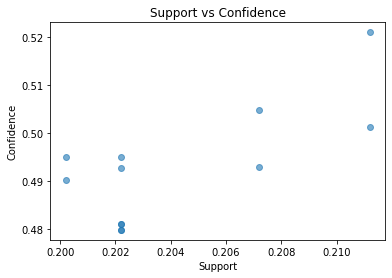

In [25]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.6)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

In [27]:
pip install streamlit pandas mlxtend matplotlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.2 requires typing-extensions~=3.7.4, but you have typing-extensions 4.1.1 which is incompatible.



  Using cached typing_extensions-4.1.1-py3-none-any.whl (26 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
